# Applying different filters to the image
---

### Examples of applying simple filters to images through convolution

***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./data/"
IMAGE_NAME = "image.png"

## Load and display image

In [3]:
# building path to file
image_paths = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = mpimg.imread(image_paths)

## Auxiliary function for displaying and saving the image 

In [4]:
def plot_image(image, name = None):
    plt.style.use('dark_background')
    plt.figure(figsize=(16,16))
    
    if (len(image.shape) == 3):
        plt.imshow(image, interpolation='nearest')
    else:
        plt.imshow(image, interpolation='nearest', cmap='gray')
    
    plt.axis("off")
    
    if (name): 
        plt.savefig(name + '.png')
        
    plt.show()

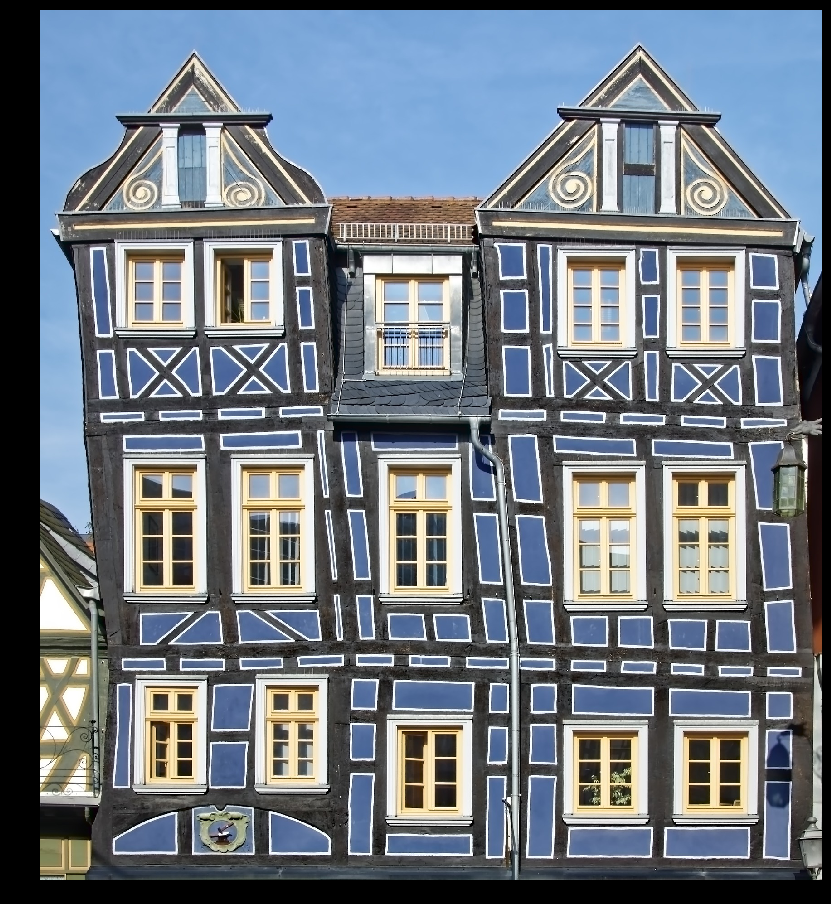

In [5]:
plot_image(image, "0")

## Auxiliary function that converts a color image to grayscale 

In [6]:
def convert_rgb_2_gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

## Conversion of an image to black and white

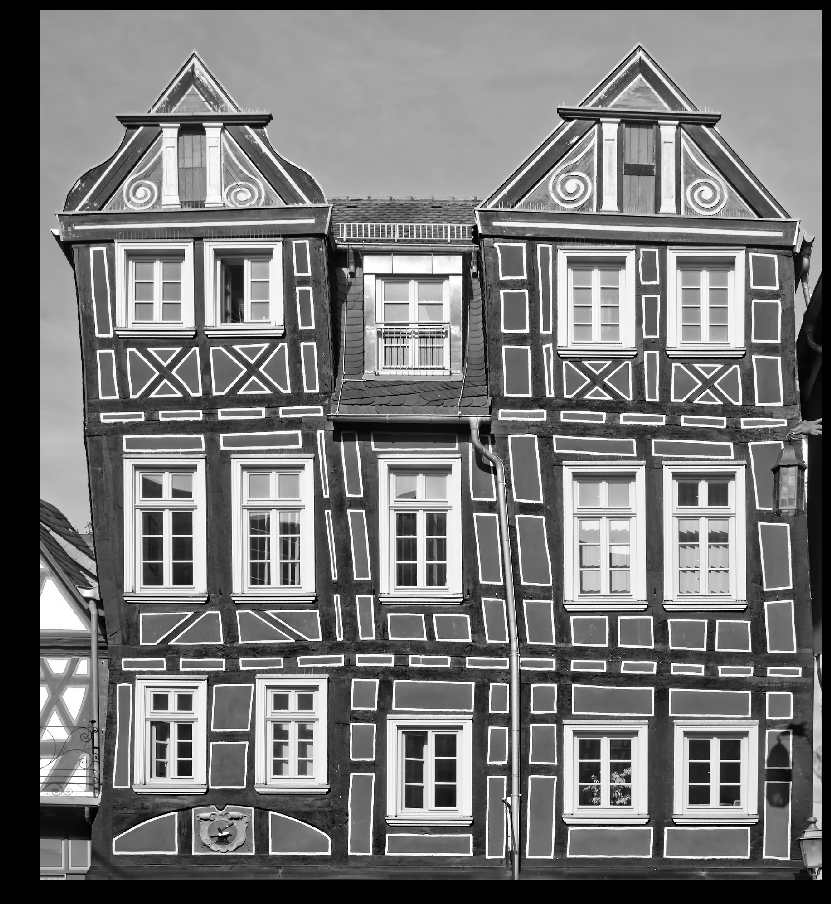

In [7]:
image_gray = convert_rgb_2_gray(image)
plot_image(image_gray)

## Auxiliary functions responsible for convolution

In [8]:
def simple_conv2d(image, kernel):
    return np.multiply(image, kernel).sum()

In [9]:
A = np.array(
    [[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]]
)

B = np.array(
    [[1, 2 ,1],
    [2, 1, 2],
    [1, 2, 1]]
)

assert simple_conv2d(A, B) == 1*1 + 2*2 + 3*1 + 4*2 + 5*1 + 6*2 + 7*1 + 8*2 + 9*1

In [10]:
def calculate_output_dimension(image_dim, kernel_dim, padding = 0, stride = 1):
    return math.floor((image_dim + 2 * padding - kernel_dim)/stride) + 1

In [11]:
assert calculate_output_dimension(5, 3) == 3
assert calculate_output_dimension(3, 3) == 1
assert calculate_output_dimension(5, 3, 1) == 5
assert calculate_output_dimension(7, 3, 1, 2) == 4

In [12]:
def crop(image, anchor, shape):
    return image[anchor[0]:anchor[0] + shape[0], anchor[1]:anchor[1] + shape[1]]

In [13]:
A = np.reshape(np.arange(49), (7,7))

B = np.array(
    [[0, 1, 2],
    [7, 8, 9],
    [14, 15, 16]]
)

C = np.array(
    [[16, 17, 18, 19],
    [23, 24, 25, 26],
    [30, 31, 32, 33],
    [37, 38, 39, 40]]
)

np.testing.assert_array_equal(crop(A, (0, 0), (3, 3)), B)
np.testing.assert_array_equal(crop(A, (2, 2), (4, 4)), C)

In [14]:
def apply_filter(image, kernel, padding = 0, stride = 1):
    # acquisition of input image and kernel dimensions
    (image_height, image_width) = image.shape
    (kernel_height, kernel_width) = kernel.shape
    
    # preparation of memory for the returned array
    output = np.zeros((
        calculate_output_dimension(image_height, kernel_height, padding, stride),
        calculate_output_dimension(image_width, kernel_width, padding, stride)
    ))
    
    (output_height, output_width) = output.shape
    
    # addition of padding
    image_with_padding = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)
    
    for x in range(output_height):
        for y in range(output_width):
            output[x, y] = simple_conv2d(crop(image_with_padding, (x * stride, y * stride), kernel.shape), kernel)
    
    return output

In [15]:
def post_actions(image):
    image_norm =  (image - np.min(image))/(np.max(image) - np.min(image))
    return (image_norm > 0.6).astype(int)

In [16]:
K1 = np.array(
    [[1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]]
)

I1 = apply_filter(image_gray, K1)

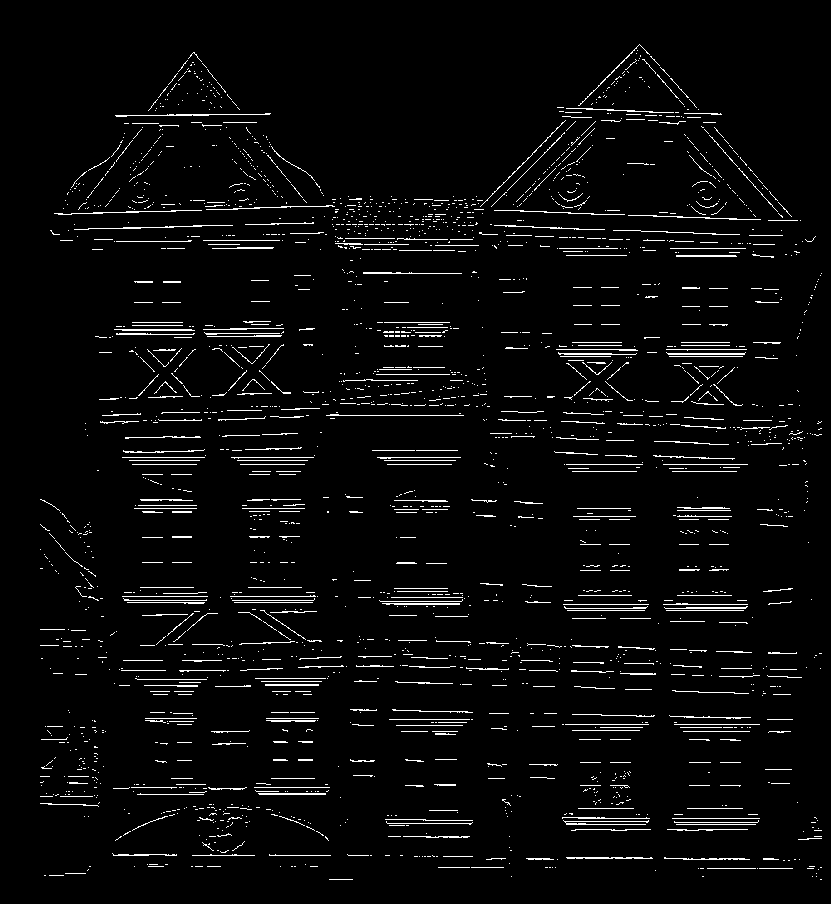

In [17]:
I1 = post_actions(I1)
plot_image(I1, "1")

In [18]:
K2 = np.array(
    [[0, 1, 2],
    [-1, 0, 1],
    [-2, -1, 0]]
)

I2 = apply_filter(image_gray, K2)

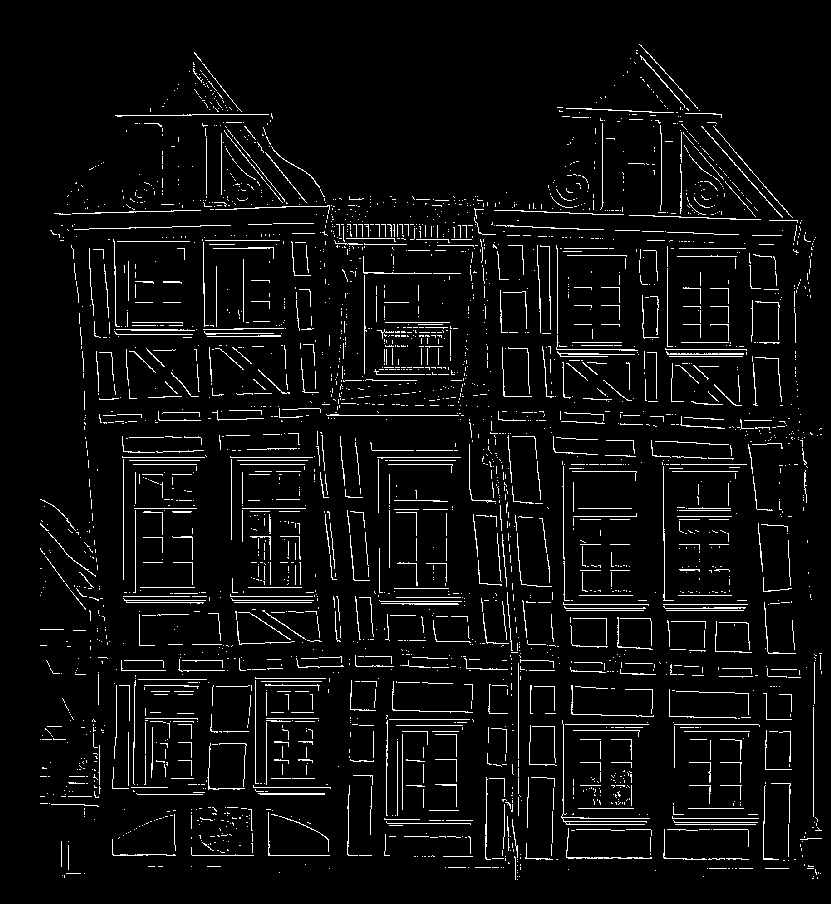

In [19]:
I2 = post_actions(I2)
plot_image(I2, "2")

In [20]:
K3 = np.array(
    [[1, 0, -1],
    [0, 0, 0],
    [-1, 0, 1]]
)

I3 = apply_filter(image_gray, K3)

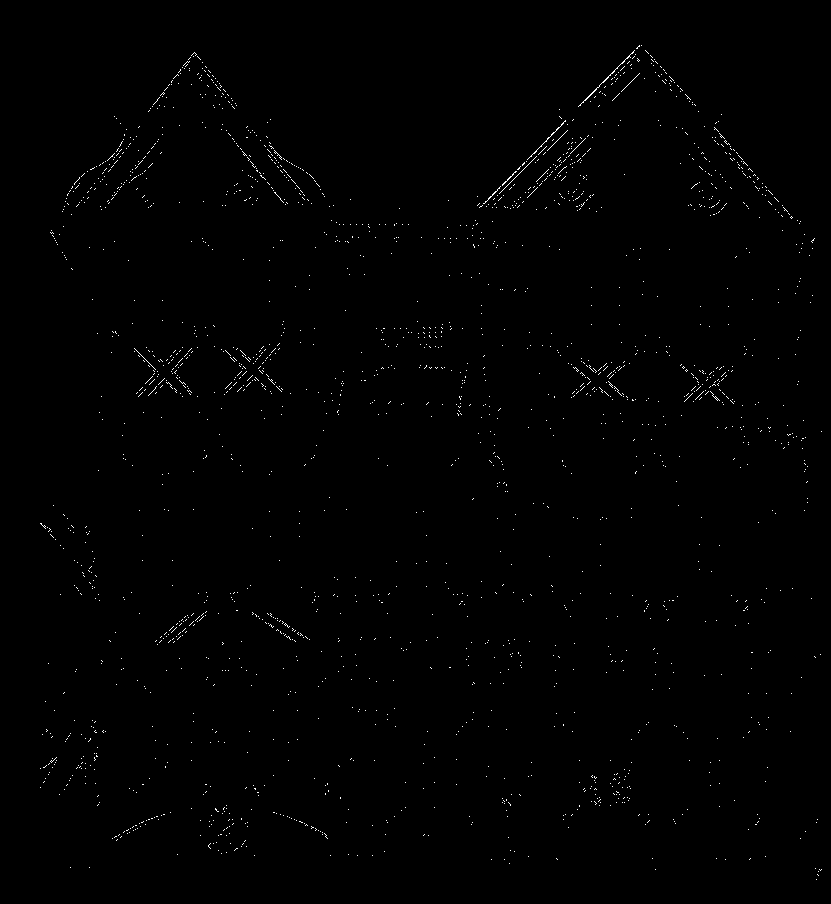

In [21]:
I3 = post_actions(I3)
plot_image(I3, "3")

In [22]:
K4 = np.array(
    [[0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]]
)

I4 = apply_filter(image_gray, K4)

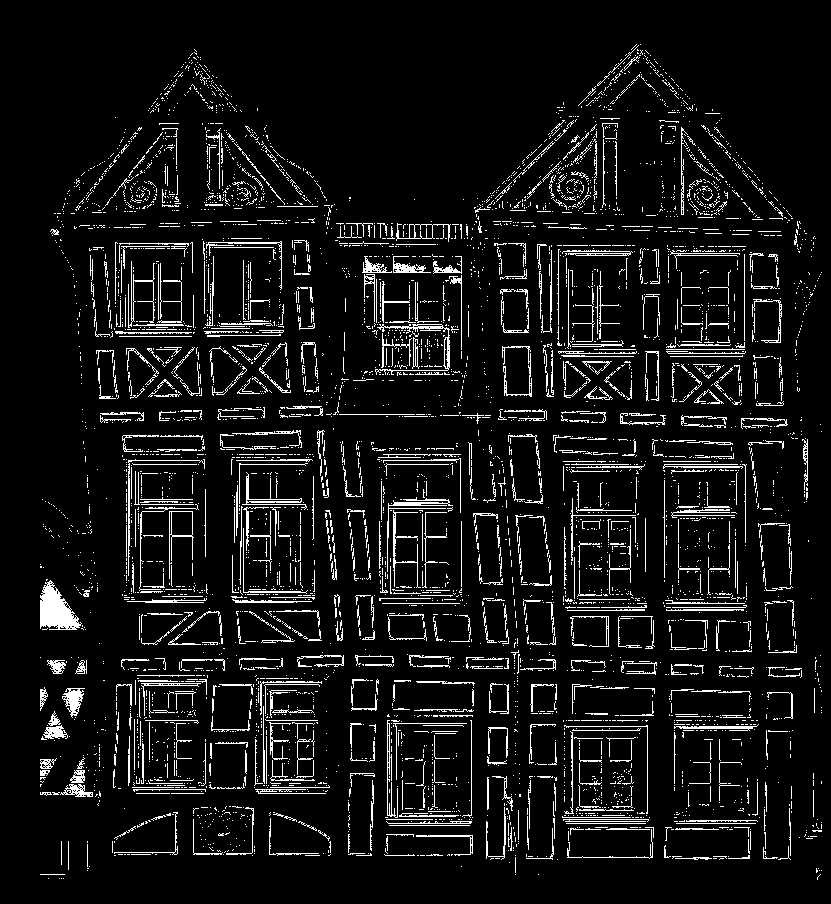

In [23]:
I4 = post_actions(I4)
plot_image(I4, "4")

In [32]:
np.random.randint(10, size=(6, 6))

array([[3, 0, 1, 5, 1, 3],
       [5, 7, 3, 4, 4, 6],
       [7, 7, 1, 8, 3, 5],
       [6, 1, 7, 0, 0, 5],
       [0, 4, 5, 5, 7, 2],
       [3, 2, 0, 2, 0, 2]])